In [36]:
using Yao
using StatsBase, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [3]:
circuit = chain( # compose gates
    4,
    put(1=>X), # put single gate
    repeat(H, 2:4), # Hgates
    control(2, 1=>X), # (control, target)
    control(4, 3=>X),
    control(3, 1=>X),
    control(4, 3=>X),
    repeat(H, 1:4),
)

nqubits: 4
chain
├─ put on (1)
│  └─ X
├─ repeat on (2, 3, 4)
│  └─ H
├─ control(2)
│  └─ (1,) X
├─ control(4)
│  └─ (3,) X
├─ control(3)
│  └─ (1,) X
├─ control(4)
│  └─ (3,) X
└─ repeat on (1, 2, 3, 4)
   └─ H


In [10]:
put(4, (1, 2)=>swap(2, 1, 2))
# all function can have qubit number as variable

nqubits: 4
put on (1, 2)
└─ put on (1, 2)
   └─ SWAP


In [17]:
put(4, (1, 2)=>swap(2, 1, 2))
(n -> put(n, (1, 2)=>swap(2, 1, 2)))

#7 (generic function with 1 method)

In [19]:
put((1, 2)=>swap(2, 1, 2))(2)

nqubits: 2
put on (1, 2)
└─ put on (1, 2)
   └─ SWAP


In [21]:
control(2, 1=>X)
(n -> control(n, 2, 1 => X))

control(2, 1=>X)(4)

nqubits: 4
control(2)
└─ (1,) X

In [30]:
println(typeof(circuit))
println(YaoBlocks.ChainBlock{4})

ChainBlock{4}
ChainBlock{4}


# Construct GHZ state from 00...00

### create ArrayReg for initial state

In [31]:
zero_state(4)

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 4/4

In [32]:
ArrayReg(bit"0000")

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 4/4

### Apply ArrayReg to circuit

In [33]:
apply!(zero_state(4), circuit)

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 4/4

### |> operator

In [37]:
results = zero_state(4) |> circuit |> r->measure(r, nshots=1000)

1000-element Array{BitBasis.BitStr{4,Int64},1}:
 0000 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 0000 ₍₂₎
 0000 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
        ⋮
 1111 ₍₂₎
 1111 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 1111 ₍₂₎
 0000 ₍₂₎
 0000 ₍₂₎

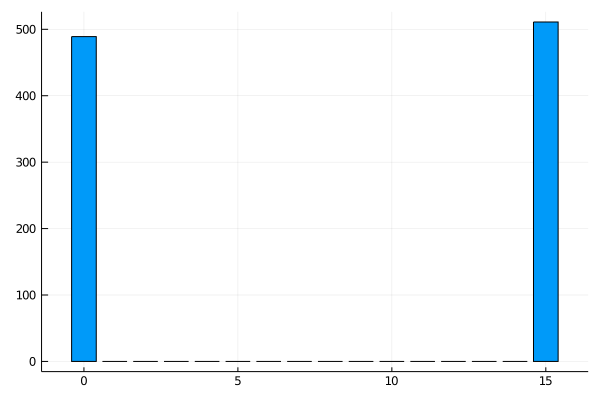

In [38]:
hist = fit(Histogram, Int.(results), 0:16)
bar(hist.edges[1] .- 0.5, hist.weights, legend=:none)